## Importing 2017 Annual Survey of School System Finances Data Set to Google Drive

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import io
import seaborn as seasborn
from google.colab import drive
drive.mount("/content/driveG")

Drive already mounted at /content/driveG; to attempt to forcibly remount, call drive.mount("/content/driveG", force_remount=True).


### Opening districts.cvs

In [ ]:
df1 = pd.read_csv('/content/driveG/MyDrive/CIS 2033 Honors Project/Starter Data set/districts.csv', delimiter=',')
df1.dataframeName = 'districts.csv'
df1.head(5)

,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
0,Alabama,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,76672,43843,23941,6401.0,1506
1,Alabama,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,299880,164977,97231,19439.0,9749
2,Alabama,912.0,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,10070,4907,3896,975.0,110
3,Alabama,2842.0,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,29843,15302,7901,2274.0,4133
4,Alabama,3322.0,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,31662,16407,11087,3122.0,486


### Delete Column year data from dataframe because it is constant across districts

In [ ]:
del df1['YRDATA']

### Dictonaries to keep track of variances

In [ ]:
#key = variable title, value = max, or something else
dicMaxVarianceperVariable = {}
#using title do dict_of_ENROLL_corr_TOTALREV:find key (state) from max
dicMinVarianceperVariable = {}
dicMaxAverageVarianceperVariable = {}
dicMinAverageVarianceperCorr = {}

dicavgCorr = {} #comparison: avg correlation
dicmisueAvgCorr = {} #comparison: agregated
 
#state: num districts
dicNumDistricts = {}


#Finding Average Correlation between Enroll and TotalRev at national level using method 1 and method 2
### Method 1: creates a data frame for each state. Sums the values for TotalREV and ENROLL in each state. Then, in variable total_corr_ENROLL_TOTALREV, it adds the correlation of ENROLL and TOTALREV in each. Then divide the total correlation by 51 - 50 states + washington D.C to get the average correlation
### Method 2: Aggregation. creates a data frame for each state. Finds the average ENROLL value and TOTALREV value in each state. Put these average values into a an ENROLL series and TOTALREV series, and then find the average of these series. 


In [ ]:
avgENROLL = 0
avgTOTALREV = 0
total_corr_ENROLL_TOTALREV = 0
arrayENROLLvar = []
arrayTOTALREVvar = []
misuseAvgENROLL = 0
misuseAvgTOTALREV = 0
misuesTotENROLL = 0
misuesTotTOTALREV = 0

#contains all coorelations between these variables (ENROLL v TOTALREV)
dict_of_ENROLL_corr_TOTALREV = {}

#contains correct average value
avgCorr_ENROLL_TOTALREV  = 0


#contains incorrect average statename: average variable value
misuseDict_avgENROLL = {}
misuseDict_avgTOTALREV = {}

#contains incorrect average correlation 
misuse_AvgCorr_ENROLL_TOTALREV = 0

#This is the highest correlation
maxCorr_ENROLL_TOTALREV = {}

#contains state with highest correlation
maxCorrState_ENROLL_TOTALREV = {}

#This is the lowest correlation
minCorr_ENROLL_TOTALREV = {}

#contains state with lowest correlation
minCorrState_ENROLL_TOTALREV = {}


for stateName in arr_of_states:
  dfstateName = df1.loc[df1['STATE'] == stateName]
  dict_of_ENROLL_corr_TOTALREV[stateName] = float(dfstateName['TCURINST'].corr(dfstateName['TOTALEXP']))

  #METHOD 1:
  avgENROLL +=dfstateName['TCURINST']
  avgTOTALREV +=dfstateName['TOTALEXP']
  total_corr_ENROLL_TOTALREV += dict_of_ENROLL_corr_TOTALREV[stateName]

  #METHOD 2: Aggregation
  misuseAvgENROLL= sum(dfstateName['TCURINST'])/ len(dfstateName)
  misuesAvgTOTALREV = sum(dfstateName['TOTALEXP'])/len(dfstateName)
 
  misuseDict_avgENROLL[stateName] = misuseAvgENROLL
  misuseDict_avgTOTALREV[stateName] = misuseAvgTOTALREV

#Method 1:
avgCorr_ENROLL_TOTALREV = total_corr_ENROLL_TOTALREV/len(arr_of_states)

#Method 2:
misuse_AvgENROLL = pd.Series(misuseDict_avgENROLL.values())
misues_AvgTOTALREV = pd.Series(misuseDict_avgTOTALREV.values())
misuse_AvgCorr_ENROLL_TOTALREV = misuse_AvgENROLL.corr(misues_AvgTOTALREV)

#finding max and and min correlations from Method 1 and printing them out
maxCorr_ENROLL_TOTALREV = max(dict_of_ENROLL_corr_TOTALREV.values())
maxCorrState_ENROLL_TOTALREV = max(dict_of_ENROLL_corr_TOTALREV, key=dict_of_ENROLL_corr_TOTALREV.get)

minCorr_ENROLL_TOTALREV = min(dict_of_ENROLL_corr_TOTALREV.values())
minCorrState_ENROLL_TOTALREV = min(dict_of_ENROLL_corr_TOTALREV, key=dict_of_ENROLL_corr_TOTALREV.get)

print("Max Corr: " + str(maxCorr_ENROLL_TOTALREV))
print(maxCorrState_ENROLL_TOTALREV)
print("Min Corr: " + str(minCorr_ENROLL_TOTALREV))
print(minCorrState_ENROLL_TOTALREV )
print("Vermont: " + str(dict_of_ENROLL_corr_TOTALREV .get('Vermont')))
# val1)

Max Corr: 0.9984142776476955
New York
Min Corr: 0.9463272658075289
District of Columbia
Vermont: 0.9679212981236219


# DF for states and number of districts



In [ ]:
from array import *
array = {}
data = {}
for stateName in arr_of_states:
  dfstate = df1.loc[df1['STATE'] == stateName]
  print(stateName+ ": " + str(dfstate.shape[0])) 
  array[stateName] = dfstate.shape[0]
  data.update({'STATE':[stateName], 
          'districts': dfstate.shape[0]})

df_NumDistricts = pd.DataFrame(data)



max_value = max(array, key=array.get)
min_value = min(array, key=array.get)

print("(max) State: " + str(max_value) + " has " +  str(array.get(max_value)) + " districts")
print("(min) State: " + str(min_value) + " has " +  str(array.get(min_value)) + " districts")

df3=df1.join(df_NumDistricts, lsuffix="_left", rsuffix="_right")
df3.head(10)

Alabama: 3255
Alaska: 1330
Arizona: 5856
Arkansas: 6949
California: 26132
Colorado: 4667
Connecticut: 4316
Delaware: 474
District of Columbia: 25
Florida: 1675
Georgia: 4790
Hawaii: 25
Idaho: 2851
Illinois: 25078
Indiana: 7879
Iowa: 9577
Kansas: 7431
Kentucky: 4199
Louisiana: 1694
Maine: 6989
Maryland: 600
Massachusetts: 9430
Michigan: 17260
Minnesota: 10508
Mississippi: 3725
Missouri: 13128
Montana: 11742
Nebraska: 12033
Nevada: 425
New Hampshire: 4389
New Jersey: 14292
New Mexico: 2131
New York: 17303
North Carolina: 2937
North Dakota: 6025
Ohio: 18139
Oklahoma: 13132
Oregon: 5851
Pennsylvania: 15080
Rhode Island: 915
South Carolina: 2439
South Dakota: 4036
Tennessee: 3446
Texas: 26385
Utah: 1007
Vermont: 8194
Virginia: 3527
Washington: 7535
West Virginia: 1423
Wisconsin: 10726
Wyoming: 1206
(max) State: Texas has 26385 districts
(min) State: District of Columbia has 25 districts


,STATE_left,ENROLL,NAME,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT,STATE_right,districts
0,Alabama,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,80867,7447,53842,19578,76672,43843,23941,6401.0,1506,Wyoming,1206.0
1,Alabama,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,338236,23710,145180,169346,299880,164977,97231,19439.0,9749,NaN,NaN
2,Alabama,912.0,BARBOUR COUNTY SCHOOL DISTRICT,10116,2342,5434,2340,10070,4907,3896,975.0,110,NaN,NaN
3,Alabama,2842.0,EUFAULA CITY SCHOOL DISTRICT,26182,3558,15900,6724,29843,15302,7901,2274.0,4133,NaN,NaN
4,Alabama,3322.0,BIBB COUNTY SCHOOL DISTRICT,32486,3664,21846,6976,31662,16407,11087,3122.0,486,NaN,NaN
5,Alabama,7870.0,BLOUNT COUNTY SCHOOL DISTRICT,69966,6929,48563,14474,68297,37442,22662,5500.0,2193,NaN,NaN
6,Alabama,1477.0,ONEONTA CITY SCHOOL DISTRICT,13464,992,8541,3931,12726,6999,3758,1541.0,214,NaN,NaN
7,Alabama,1505.0,BULLOCK COUNTY SCHOOL DISTRICT,14876,3061,9273,2542,14713,6996,6006,1542.0,31,NaN,NaN
8,Alabama,3135.0,BUTLER COUNTY SCHOOL DISTRICT,32062,6439,18770,6853,31393,16091,10523,2950.0,471,NaN,NaN
9,Alabama,2099.0,ANNISTON CITY SCHOOL DISTRICT,23776,4344,11810,7622,24320,12649,9344,1890.0,413,NaN,NaN


TCAPOUT v TOTALREV
```
# This is formatted as code
```



# Correlation Matrix of Method 1:
### Prints correlations of each pair of variables from least to highest

            ENROLL  TOTALREV   TFEDREV    TSTREV   TLOCREV  TOTALEXP  \
ENROLL    1.000000  0.903893  0.872470  0.902346  0.827235  0.899931   
TOTALREV  0.903893  1.000000  0.934427  0.962743  0.956525  0.997634   
TFEDREV   0.872470  0.934427  1.000000  0.920551  0.845073  0.931299   
TSTREV    0.902346  0.962743  0.920551  1.000000  0.844860  0.957631   
TLOCREV   0.827235  0.956525  0.845073  0.844860  1.000000  0.957232   
TOTALEXP  0.899931  0.997634  0.931299  0.957631  0.957232  1.000000   
TCURINST  0.849565  0.984790  0.899747  0.931962  0.962290  0.988532   
TCURSSVC  0.940568  0.971548  0.937246  0.954692  0.903877  0.965231   
TCURONON  0.948164  0.923035  0.916939  0.927802  0.832772  0.917129   
TCAPOUT   0.843315  0.908046  0.846898  0.882947  0.860407  0.922159   

          TCURINST  TCURSSVC  TCURONON   TCAPOUT  
ENROLL    0.849565  0.940568  0.948164  0.843315  
TOTALREV  0.984790  0.971548  0.923035  0.908046  
TFEDREV   0.899747  0.937246  0.916939  0.846898  
TST

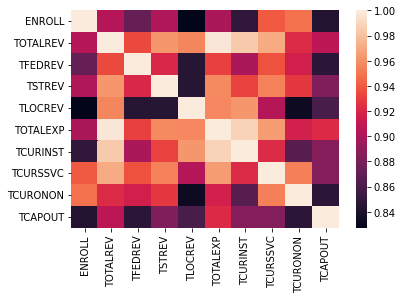

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df1.corr());
#prints heatmap and correlations
df2=df1.corr()
print(df2)

#prints correlations from least to highest, and prints the min, median, and high
df1.corr().unstack().sort_values().drop_duplicates()
arr_of_corrlations = df1.corr().unstack().sort_values().drop_duplicates()

print(df1.corr().unstack().sort_values().drop_duplicates())
print(arr_of_corrlations.get(0))
print(arr_of_corrlations.get((len(arr_of_corrlations)-1) /2))
print(arr_of_corrlations.get((len(arr_of_corrlations)-1) - 1))




# Misuse Correlations:

##Step 1: Create a dataframe of the average variable values for each state

In [ ]:
import itertools
import pandas as pd

misuseAvg1 = 0
misuseAvg2 = 0
listVariables = ['ENROLL', 'TOTALREV','TFEDREV', 'TSTREV' 'TLOCREV', 'TOTALEXP', 'TCURINST', 'TCURSSVC', 'TCURONON', 'TCAPOUT']

dfAggregatedAverages = pd.DataFrame()

for stateName in arr_of_states:
  dfstateName = df1.loc[df1['STATE'] == stateName]
  dfAggregatedAverages[stateName] = dfstateName.drop('NAME', axis=1).drop('STATE',axis=1).sum()/dfstateName.shape[0]

print(dfAggregatedAverages.T)



                             ENROLL      TOTALREV        TFEDREV  \
Alabama                 5431.036559  4.259489e+04    4637.088172   
Alaska                  2353.617293  3.233157e+04    4729.066165   
Arizona                 3583.287227  2.807993e+04    3357.743340   
Arkansas                1560.749173  1.299253e+04    1465.720967   
California              5460.287502  5.338206e+04    5537.832925   
Colorado                3864.929505  3.459460e+04    2374.963145   
Connecticut             2908.974977  4.334094e+04    2003.897590   
Delaware                5753.839662  7.156999e+04    5261.624473   
District of Columbia   59518.160000  1.020790e+06  117847.080000   
Florida                35626.611343  3.114199e+05   31984.928955   
Georgia                 7534.177871  7.012647e+04    6247.698330   
Hawaii                176080.760000  2.005602e+06  206691.240000   
Idaho                   2150.852333  1.462791e+04    1517.620133   
Illinois                1938.913191  2.120683e+0

## Step 2: Use this data frame to create a heatmap of aggregated data of the United States


            ENROLL  TOTALREV   TFEDREV    TSTREV   TLOCREV  TOTALEXP  \
ENROLL    1.000000  0.986230  0.973862  0.938763  0.359183  0.978699   
TOTALREV  0.986230  1.000000  0.995101  0.885832  0.487845  0.998488   
TFEDREV   0.973862  0.995101  1.000000  0.863606  0.516980  0.994772   
TSTREV    0.938763  0.885832  0.863606  1.000000  0.027246  0.860249   
TLOCREV   0.359183  0.487845  0.516980  0.027246  1.000000  0.532914   
TOTALEXP  0.978699  0.998488  0.994772  0.860249  0.532914  1.000000   
TCURINST  0.992937  0.998254  0.988991  0.907401  0.444145  0.994519   
TCURSSVC  0.961495  0.992784  0.993529  0.824521  0.587339  0.997285   
TCURONON  0.995661  0.983504  0.975707  0.949998  0.330735  0.973109   
TCAPOUT   0.788848  0.866578  0.885427  0.540198  0.849421  0.891290   

          TCURINST  TCURSSVC  TCURONON   TCAPOUT  
ENROLL    0.992937  0.961495  0.995661  0.788848  
TOTALREV  0.998254  0.992784  0.983504  0.866578  
TFEDREV   0.988991  0.993529  0.975707  0.885427  
TST

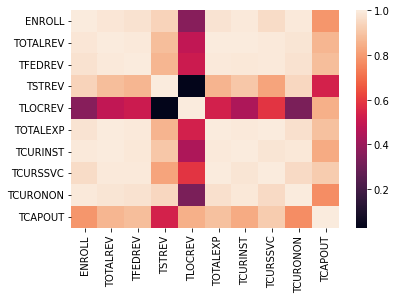

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#prints heatmap
sns.heatmap(dfAggregatedAverages.T.corr());

#prints data frame 
dfAggregatedCorrs=dfAggregatedAverages.T.corr()
print(dfAggregatedCorrs)

#prints the correlations ranked from least to greatest
dfAggregatedAverages.T.corr().unstack().sort_values().drop_duplicates()
arr_of_corrlations = dfAggregatedAverages.T.corr().unstack().sort_values().drop_duplicates()
print(dfAggregatedAverages.T.corr().unstack().sort_values().drop_duplicates())

#prints min, max, and median correlations
print(arr_of_corrlations.get(0))
print(arr_of_corrlations.get((len(arr_of_corrlations)-1) /2))
print(arr_of_corrlations.get((len(arr_of_corrlations)-1) - 1))

# Scatter plots of aggregated data frame compared with scatter plots of states

### Scatter plots of aggregated data frame

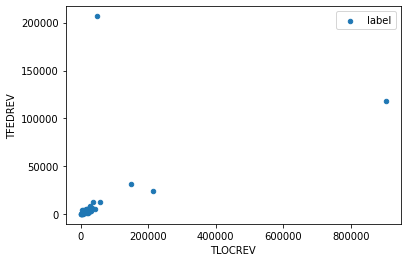

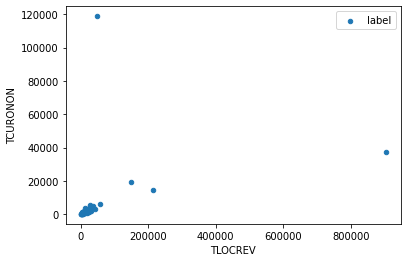

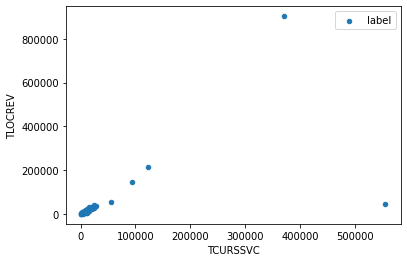

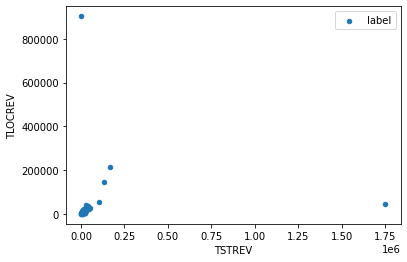

In [ ]:
dfAG = dfAggregatedAverages.T
#print(dfDC)
dfAG.plot.scatter(x='TLOCREV', y='TFEDREV',label = 'label')
plt.legend()
plt.show()
dfAG.plot.scatter(x='TLOCREV', y='TCURONON',label = 'label')
plt.legend()
plt.show()
dfAG.plot.scatter(x='TCURSSVC', y='TLOCREV',label = 'label')
plt.legend()
plt.show()
dfAG.plot.scatter(x='TSTREV', y='TLOCREV',label = 'label')
plt.legend()

### Scatter plots of New Jersey data frame

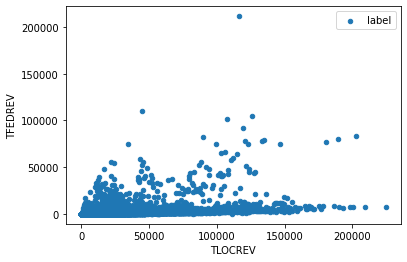

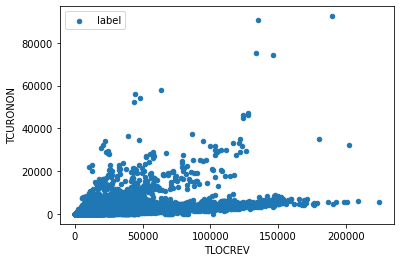

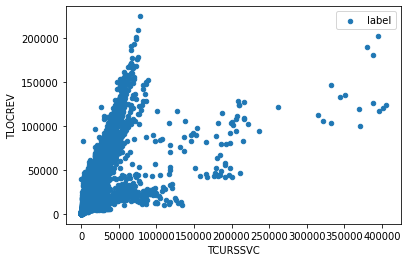

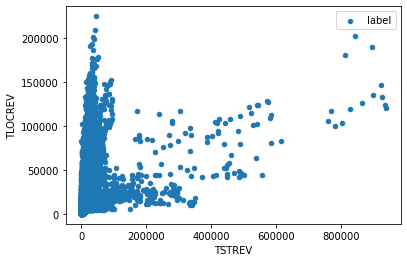

In [ ]:
dfNY = df1[(df1['STATE'] == "New Jersey")]
#print(dfDC)
dfNY.plot.scatter(x='TLOCREV', y='TFEDREV',label = 'label')
plt.legend()
plt.show()
dfNY.plot.scatter(x='TLOCREV', y='TCURONON',label = 'label')
plt.legend()
plt.show()
dfNY.plot.scatter(x='TCURSSVC', y='TLOCREV',label = 'label')
plt.legend()
plt.show()
dfNY.plot.scatter(x='TSTREV', y='TLOCREV',label = 'label')
plt.legend()
plt.show()

# Heat Maps for each state

Alabama


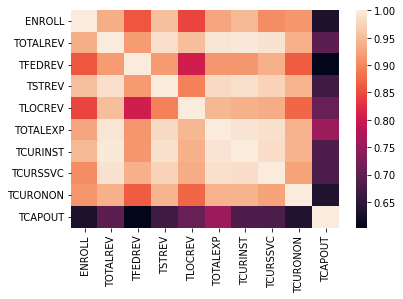

Alaska


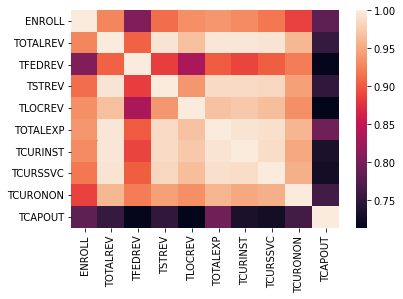

Arizona


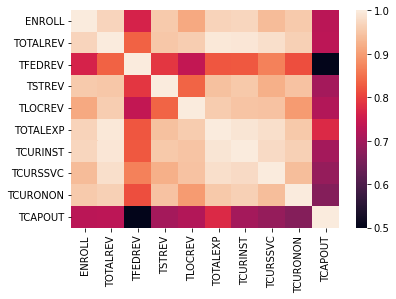

Arkansas


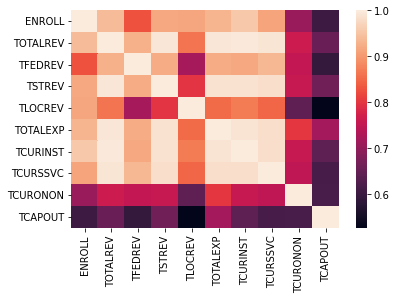

California


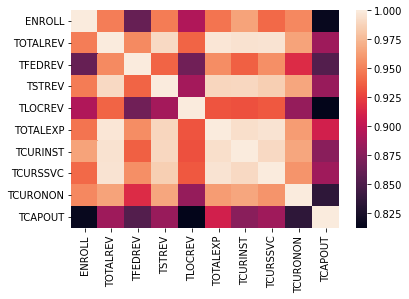

Colorado


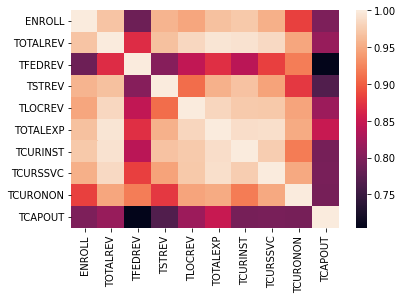

Connecticut


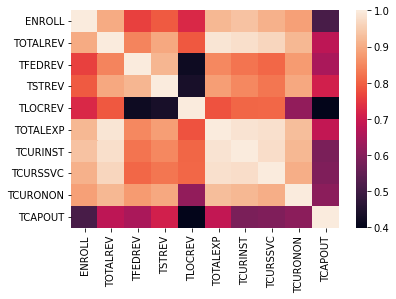

Delaware


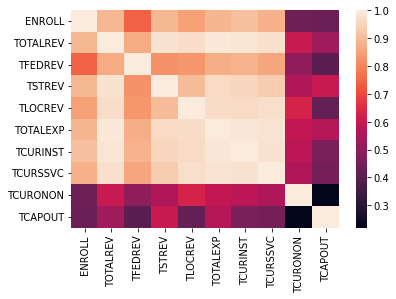

District of Columbia


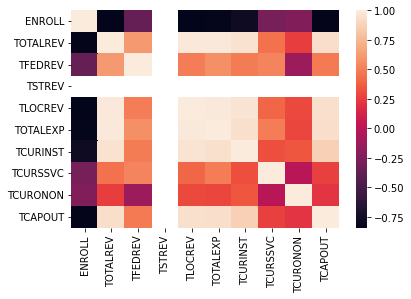

Florida


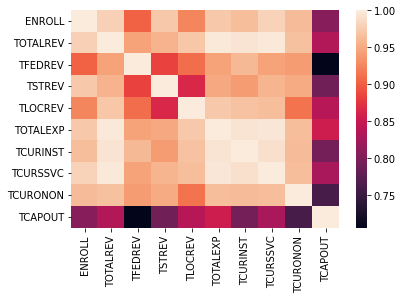

Georgia


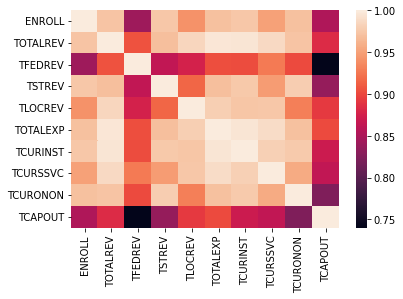

Hawaii


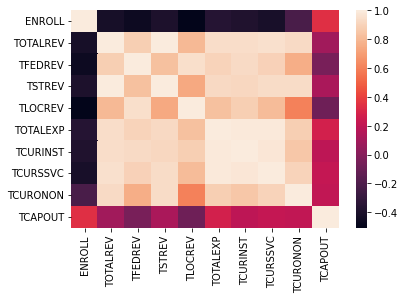

Idaho


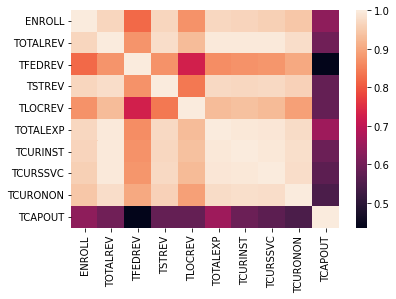

Illinois


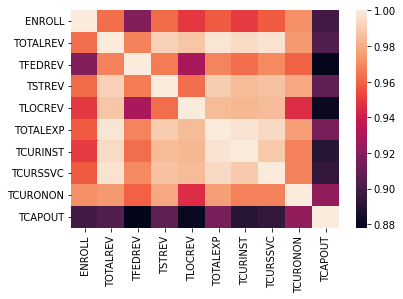

Indiana


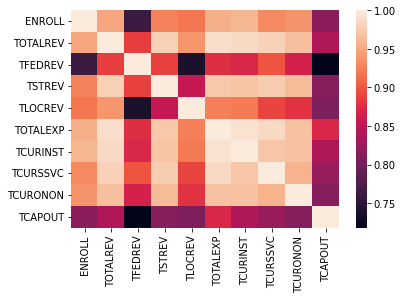

Iowa


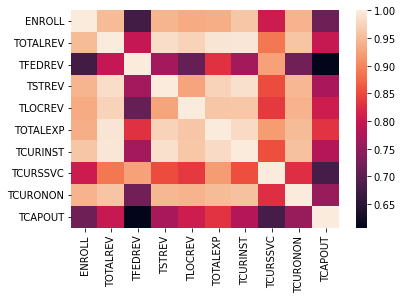

Kansas


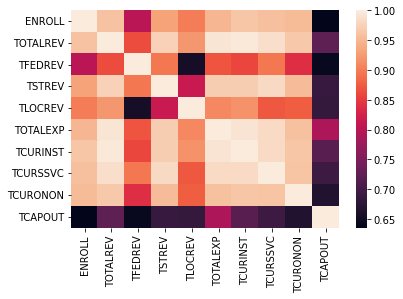

Kentucky


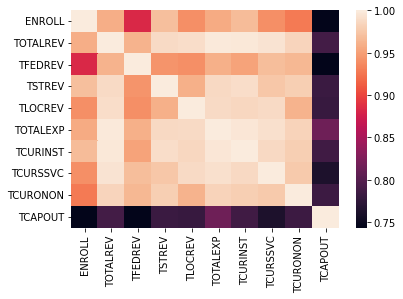

Louisiana


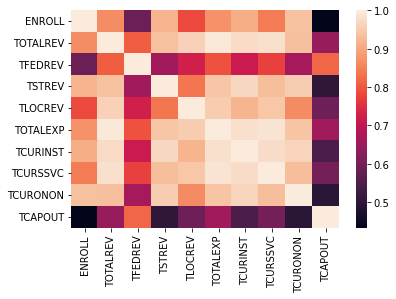

Maine


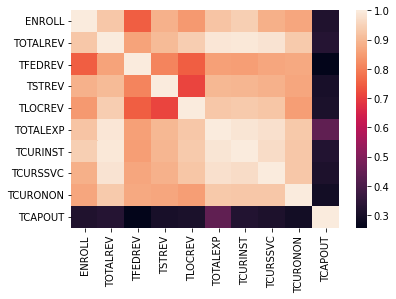

Maryland


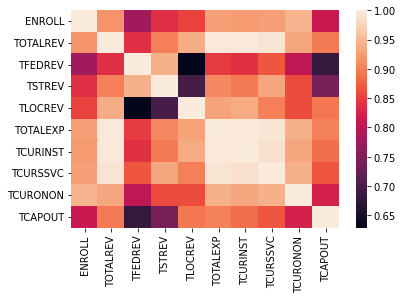

Massachusetts


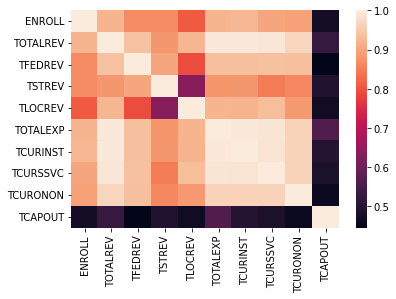

Michigan


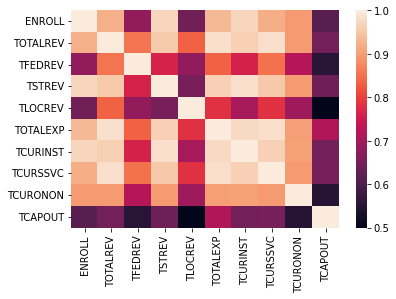

Minnesota


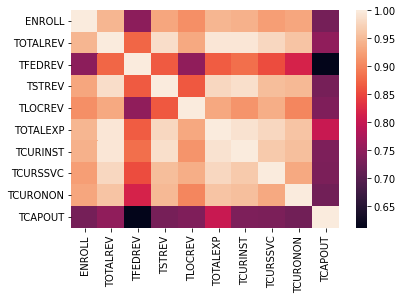

Mississippi


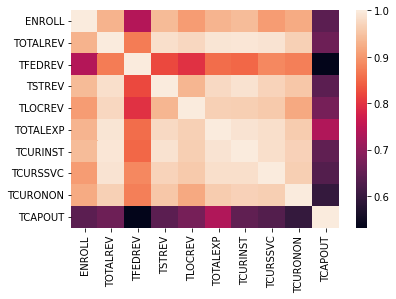

Missouri


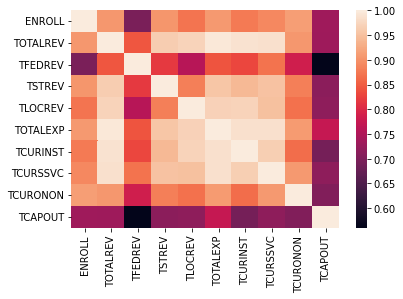

Montana


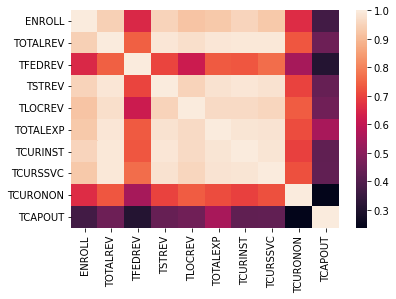

Nebraska


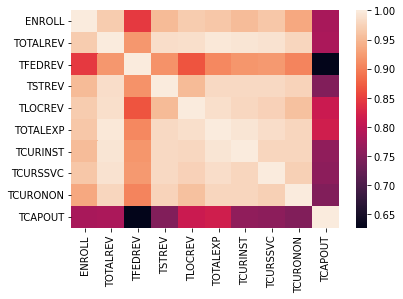

Nevada


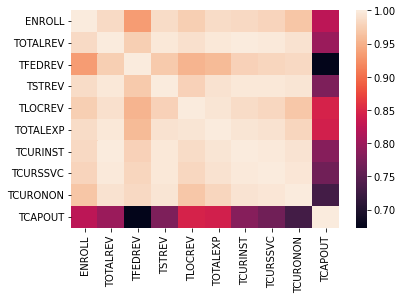

New Hampshire


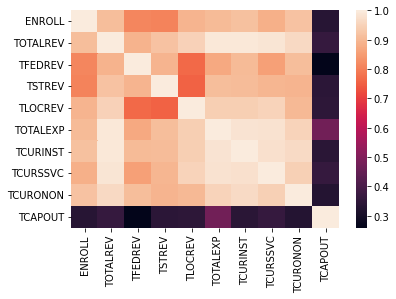

New Jersey


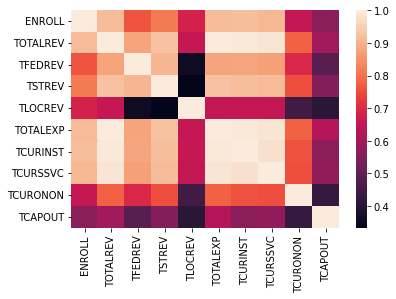

New Mexico


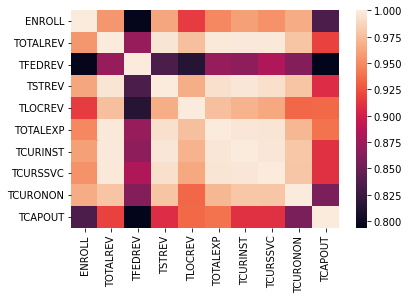

New York


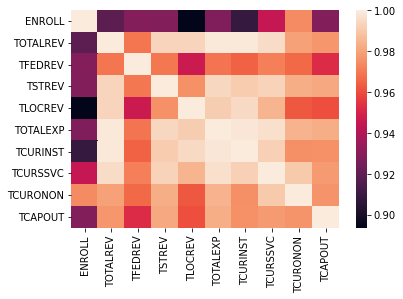

North Carolina


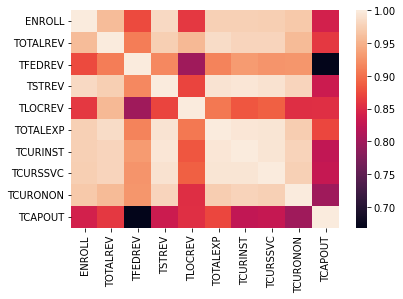

North Dakota


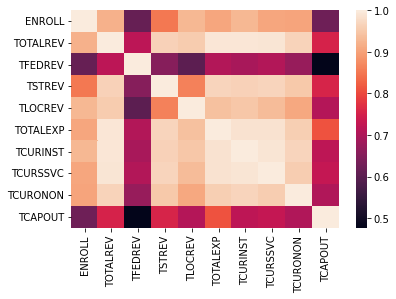

Ohio


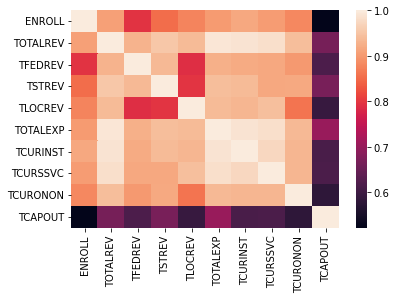

Oklahoma


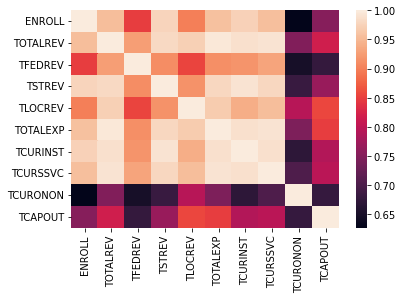

Oregon


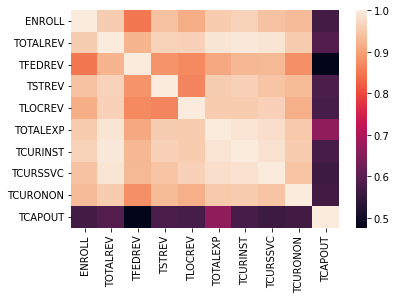

Pennsylvania


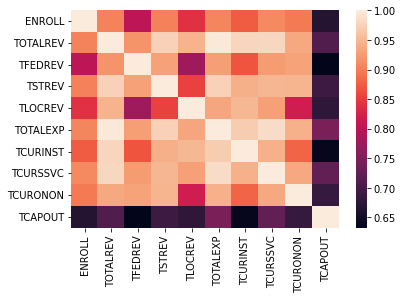

Rhode Island


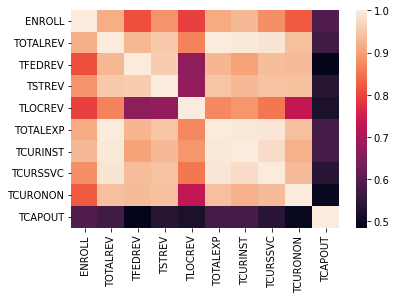

South Carolina


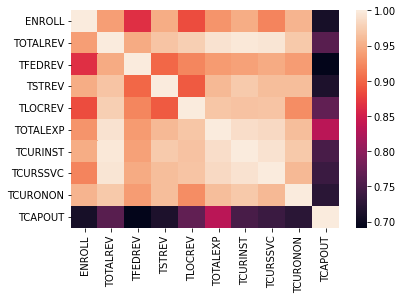

South Dakota


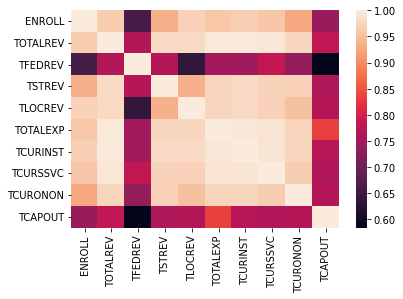

Tennessee


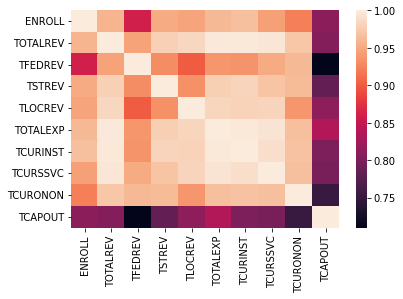

Texas


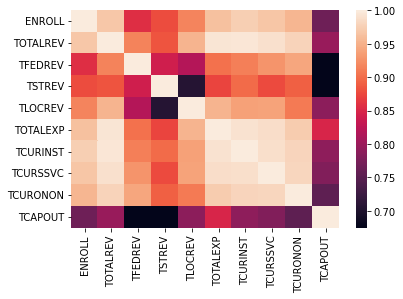

Utah


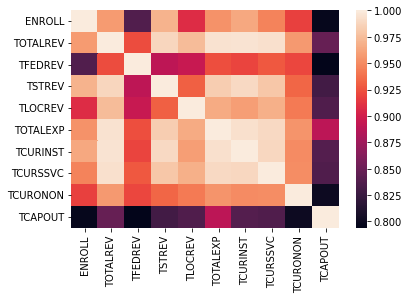

Vermont


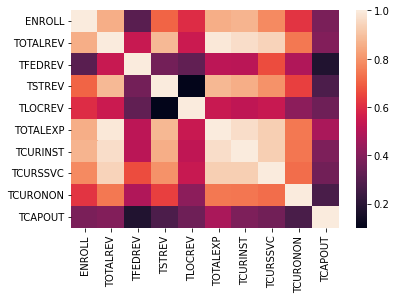

Virginia


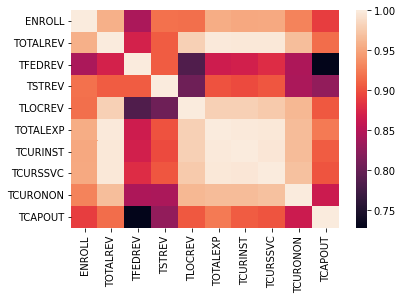

Washington


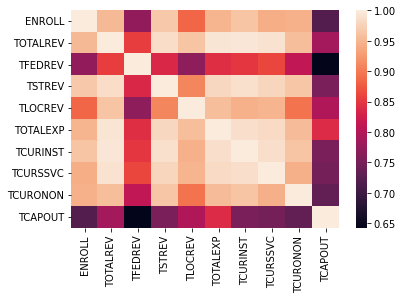

West Virginia


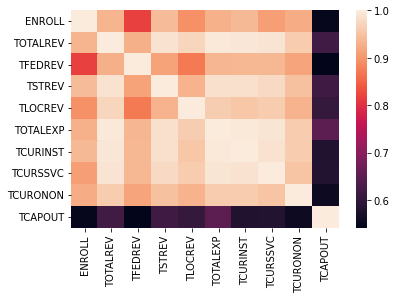

Wisconsin


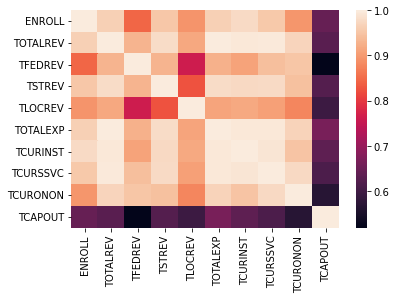

Wyoming


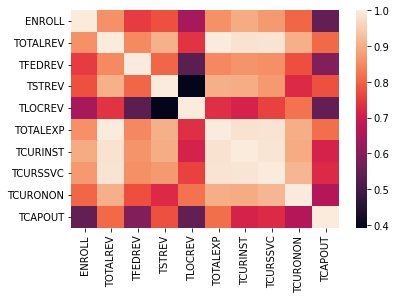

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

listStates = ["Alabama", "Alaska", "Arkansas"]
for stateName in arr_of_states:
  dfstate = df1.loc[df1['STATE'] == stateName]
  print(stateName)
  sns.heatmap(dfstate.corr())
  plt.show()

# Finding the variance of each state and each variable. 
Prints the min and max variance of a variable and the corresponding state the variance value belongs to

In [ ]:
import statistics
#intilizeing each dictionary which will store {statename, variance value of given variable}
dict_of_var_TCURSSVC = {}
dict_of_var_TOTALREV = {}
dict_of_var_TFEDREV = {}
dict_of_var_TSTREV = {}
dict_of_var_TLOCREV = {}
dict_of_var_TOTALEXP = {}
dict_of_var_TCURINST = {}
dict_of_var_TCAPOUT = {}
dict_of_var_TCURONON = {}

#STATE	ENROLL	NAME	YRDATA	TOTALREV	TFEDREV	TSTREV	TLOCREV	TOTALEXP	TCURINST	TCURSSVC	TCURONON	TCAPOUT. is the 

#dfVT = df1[(df1['STATE'] == "Vermont")]
#dfVT[['TCURINST', 'TOTALREV', 'TFEDREV', 'TSTREV', 'TLOCREV']].var()

#Iterate through each state. Store all the data for a state in one dataframe and put state's variance value into a give 
for stateName in arr_of_states:
  dfstateName = df1.loc[df1['STATE'] == stateName]

  dict_of_var_TCURSSVC.update( {stateName: dfstateName['TCURSSVC'].var()})
  dict_of_var_TOTALREV.update({stateName: dfstateName['TOTALREV'].var()})
  dict_of_var_TFEDREV.update({stateName: dfstateName['TFEDREV'].var()})
  dict_of_var_TSTREV.update({stateName: dfstateName['TSTREV'].var()})
  dict_of_var_TLOCREV.update({stateName: dfstateName['TLOCREV'].var()})
  dict_of_var_TOTALEXP.update({stateName: dfstateName['TOTALEXP'].var()})
  dict_of_var_TCURINST.update({stateName: dfstateName['TCURINST'].var()})
  dict_of_var_TCAPOUT.update({stateName: dfstateName['TCAPOUT'].var()})
  dict_of_var_TCURONON.update({stateName: dfstateName['TCURONON'].var()})


print("Max variance in TCURSSVC is: " + str(max(dict_of_var_TCURSSVC, key=dict_of_var_TCURSSVC.get)) + ": " + str(max(dict_of_var_TCURSSVC.values())))
print("Min variance in TCURSSVC is: " + str(min(dict_of_var_TCURSSVC, key=dict_of_var_TCURSSVC.get)) + ": " + str(min(dict_of_var_TCURSSVC.values())))

print("Max variance in TOTALREV is: " + str(max(dict_of_var_TOTALREV, key=dict_of_var_TOTALREV.get)) + ": " + str(max(dict_of_var_TOTALREV.values())))
print("Min variance in TOTALREV is: " + str(min(dict_of_var_TOTALREV, key=dict_of_var_TOTALREV.get)) + ": " + str(min(dict_of_var_TOTALREV.values())))

print("Max variance in TFEDREV is: " + str(max(dict_of_var_TFEDREV, key=dict_of_var_TFEDREV.get)) + ": " + str(max(dict_of_var_TFEDREV.values())))
print("Min variance in TFEDREV is: " + str(min(dict_of_var_TFEDREV, key=dict_of_var_TFEDREV.get)) + ": " + str(min(dict_of_var_TFEDREV.values())))

print("Max variance in TSTREV is: " + str(max(dict_of_var_TSTREV, key=dict_of_var_TSTREV.get)) + ": " + str(max(dict_of_var_TSTREV.values())))
print("Min variance in TSTREV is: " + str(min(dict_of_var_TSTREV, key=dict_of_var_TSTREV.get)) + ": " + str(min(dict_of_var_TSTREV.values())))

print("Max variance in TLOCREV is: " + str(max(dict_of_var_TLOCREV, key=dict_of_var_TLOCREV.get)) + ": " + str(max(dict_of_var_TLOCREV.values())))
print("Min variance in TLOCREV is: " + str(min(dict_of_var_TLOCREV, key=dict_of_var_TLOCREV.get)) + ": " + str(min(dict_of_var_TLOCREV.values())))

print("Max variance in TOTALEXP is: " + str(max(dict_of_var_TOTALEXP, key=dict_of_var_TOTALEXP.get)) + ": " + str(max(dict_of_var_TOTALEXP.values())))
print("Min variance in TOTALEXP is: " + str(min(dict_of_var_TOTALEXP, key=dict_of_var_TOTALEXP.get)) + ": " + str(min(dict_of_var_TOTALEXP.values())))

print("Max variance in TCURINST is: " + str(max(dict_of_var_TCURINST, key=dict_of_var_TCURINST.get)) + ": " + str(max(dict_of_var_TCURINST.values())))
print("Min variance in TCURINST is: " + str(min(dict_of_var_TCURINST, key=dict_of_var_TCURINST.get)) + ": " + str(min(dict_of_var_TCURINST.values())))

print("Max variance in TCAPOUT is: " + str(max(dict_of_var_TCAPOUT, key=dict_of_var_TCAPOUT.get)) + ": " + str(max(dict_of_var_TCAPOUT.values())))
print("Min variance in TCAPOUT is: " + str(min(dict_of_var_TCAPOUT, key=dict_of_var_TCAPOUT.get)) + ": " + str(min(dict_of_var_TCAPOUT.values())))

print("Max variance in TCURONON is: " + str(max(dict_of_var_TCURONON, key=dict_of_var_TCURONON.get)) + ": " + str(max(dict_of_var_TCURONON.values())))
print("Min variance in TCURONON is: " + str(min(dict_of_var_TCURONON, key=dict_of_var_TCURONON.get)) + ": " + str(min(dict_of_var_TCURONON.values())))


Max variance in TCURSSVC is: Hawaii: 43587455465.99
Min variance in TCURSSVC is: Vermont: 3204155.7066538017
Max variance in TOTALREV is: Hawaii: 473390825985.4766
Min variance in TOTALREV is: Vermont: 36835773.14679341
Max variance in TFEDREV is: Hawaii: 10763714367.023333
Min variance in TFEDREV is: Vermont: 420119.1555502844
Max variance in TSTREV is: Hawaii: 340178351673.4167
Min variance in TSTREV is: District of Columbia: 0.0
Max variance in TLOCREV is: Maryland: 112811270817.70618
Min variance in TLOCREV is: Vermont: 6967953.186109435
Max variance in TOTALEXP is: New York: 496487831741.57404
Min variance in TOTALEXP is: Vermont: 37601531.178905755
Max variance in TCURINST is: New York: 220013815427.41623
Min variance in TCURINST is: Vermont: 12054255.863478174
Max variance in TCAPOUT is: District of Columbia: 15838582740.526667
Min variance in TCAPOUT is: Vermont: 527646.092521578
Max variance in TCURONON is: Florida: 1535186128.8840146
Min variance in TCURONON is: Vermont: 8672